<a href="https://colab.research.google.com/github/rafidddeshmukh/EDA-Hotel_Booking/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
#Import pakages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load the csv file of hotel booking data
path="/content/drive/MyDrive/EDA - Hotel Booking /Hotel Bookings.csv" 
df_hotel = pd.read_csv(path)


In [4]:
#Copy the data in df
df = df_hotel.copy()

## Exploring Data

In [5]:
#reading dataframe top 5 rows
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
#checking shape of dataframe
df.shape

(119390, 32)

In [7]:
#reading last 5 rows of dataframe
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


###Info

In [8]:
#getting datafame information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Descriptive Statastics

In [9]:
#getting Descriptive Statastics information of dataframe
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#Checking For missing value and Dealing with it

In [10]:
#checking for null value in dataframe , sum it and arrange it high to low and get only top 5 result
df.isnull().sum().sort_values(ascending=False)[:5]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
dtype: int64

In [11]:
#counting value in country column for getting higest booking country wise
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [12]:
#Filling null value with others in country column
df['country'].fillna('other',inplace=True)

In [13]:
#checking for null value in dataframe , sum it and arrange it high to low and get only top 5 result
df.isnull().sum().sort_values(ascending=False)[:5]

company                   112593
agent                      16340
children                       4
hotel                          0
previous_cancellations         0
dtype: int64

In [14]:
#Fill null value in company, agent and in children with 0
df['agent'].fillna(0,inplace=True)
df['company'].fillna(0,inplace=True)
df['children'].fillna(0,inplace=True)

In [15]:
#checking for null value in dataframe , sum it and arrange it high to low and get only top 5 result
df.isnull().sum().sort_values(ascending=False)[:5]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

In [16]:
## Drop the row there is no adult, babies and children
df=df.drop(df[(df.adults+df.babies+df.children)==0].index)

###Coverting dtype

In [17]:
#Converting dtype of agent, company and children from float to int
df['children']=df['children'].astype('int64')
df['company']=df['company'].astype('int64')
df['agent']=df['agent'].astype('int64')

In [18]:
#getting datafame information 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  int64  
 11  babies                          119210 non-null  int64  
 12  meal            

###ADR Outlier

In [19]:
#Checking for negative average daily rate
df["adr"].loc[df["adr"]<0]=0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [20]:
#checking for min value of average daily rate
df["adr"].min()

0.0

In [21]:
#checking for min value of average daily rate
df["adr"].max()

5400.0

In [22]:
#cheching for highest daily rate for resort hotel
df["adr"].loc[df["hotel"]=="Resort Hotel"].sort_values(ascending=False).head(5)

15083    508.00
13142    450.00
13391    437.00
39155    426.25
39568    402.00
Name: adr, dtype: float64

In [23]:
#cheching for highest daily rate for resort hotel
df["adr"].loc[df["hotel"]=="City Hotel"].sort_values(ascending=False).head(5)

48515     5400.00
111403     510.00
103912     451.50
103789     375.50
118515     372.33
Name: adr, dtype: float64

An average daily rate of 5400 seems a little too extreme when the next closest rate is 510. I'm assuming it's just a typo for 540, so let's change this too.

In [24]:
#changing ADR 5400 to 540
df["adr"].loc[df["adr"]==5400]=540

### checking for duplicate values 

In [25]:
#getting duplicate value
df[df.duplicated()].shape

(31980, 32)

In [26]:
#Drop duplicte values in dataframe
df=df.drop_duplicates()

In [27]:
#checking shape of dataframe
df.shape

(87230, 32)

###Columns

In [28]:
#to get the list of columns in dataframe
list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

##Data Visualization

###1.Hotels
First we will check which type of hotel booked most and 
we will plot pie chart for hotels in hotel there is only two types City hotel and Resort hotel

In [29]:
#getting unique value of hotel
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [30]:
#Checking which hotel type have most booking 
df['hotel'].value_counts()

City Hotel      53274
Resort Hotel    33956
Name: hotel, dtype: int64

Text(0.5, 1.0, 'Hotel')

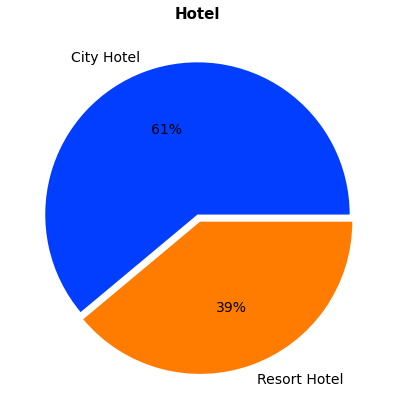

In [31]:
#for bright colour for pie chart
palette_color = sns.color_palette('bright') 
hotel=df['hotel'].value_counts()

#setting figure size
plt.figure(figsize=(14,7))

#Plotting pie chart for better understanding from seaborn
pie=plt.pie(hotel, labels=hotel.index, colors=palette_color,
         autopct='%.0f%%',explode=[0,0.05],textprops={'fontsize': 14})

#setting title for plot
plt.title('Hotel',fontsize= 15,fontweight='bold')


From this we can see that most people prefer City Hotel(61%) over Resort Hotel(39%)

###2. Cancelled Booking

Checking cancelled booking in this column there is two unique value 0(No) and 1(Yes) for both hotel type

In [32]:
 #getting unique value 
 df['is_canceled'].unique()

array([0, 1])

Text(0.5, 1.0, 'Cancelation')

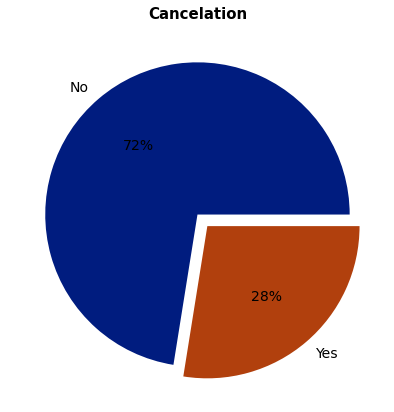

In [33]:
#for bright colour for pie chart
palette_color = sns.color_palette('dark')
cancel=df['is_canceled'].value_counts()

#setting figure size
plt.figure(figsize=(14,7))

# Plotting pie chart for cancelled booking
pie=plt.pie(cancel, labels=['No','Yes'], colors=palette_color,
         autopct='%.0f%%',explode=[0,0.1],textprops={'fontsize': 14})

#setting title for plot
plt.title('Cancelation',fontsize= 15,fontweight='bold')




From above as we can see 28% bookings were cancelled in total booking

###Checking hotel wise cancelled booking

In [34]:
#hote wise total cancellation
hotel_wise = df[df['is_canceled']==1]
hotel_wise['hotel'].value_counts()

City Hotel      16035
Resort Hotel     7974
Name: hotel, dtype: int64

In [35]:
#hotel wise total booking
df['hotel'].value_counts()

City Hotel      53274
Resort Hotel    33956
Name: hotel, dtype: int64

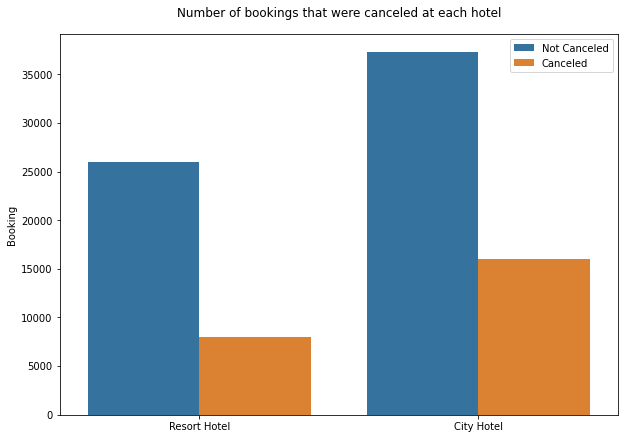

In [36]:
#setting figure size
plt.figure(figsize=(10,7))

#Ploting countplot for cancelled booking hotel wise
ax=sns.countplot(x=df["hotel"],hue=df["is_canceled"],saturation=0.7)

#setting labels for x, y and set title for countplot
plt.title("Number of bookings that were canceled at each hotel",y=1.03)
plt.xlabel("")
plt.ylabel("Booking")
plt.legend(("Not Canceled","Canceled"))


From above we ca can conclude that city hotel(23%) have more cancellation than resort hotel(19%) .

In [37]:
#cancelled booking removed
df_new=df[df['is_canceled']==0]

##3. Year wise Booking

In [38]:
#checking number of booking year wise
df_new['arrival_date_year'].value_counts()

2016    31113
2017    21527
2015    10581
Name: arrival_date_year, dtype: int64

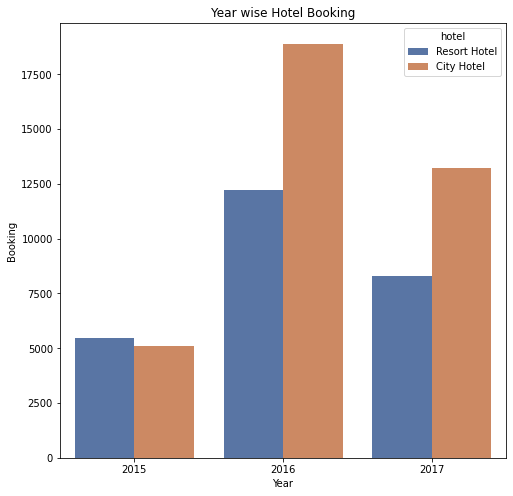

In [39]:
#setting figure size
plt.figure(figsize=(8,8))

#Ploting countplot for year wise booking
sns.countplot(x=df_new['arrival_date_year'],hue=df["hotel"], palette='deep')

#setting labels for x, y and set title for countplot
plt.xlabel('Year')
plt.ylabel('Booking')
plt.title("Year wise Hotel Booking")

#display the plot
plt.show()

Here we have three year booking data from 2015 to 2017 in which 2015 have lowest booking and 2016 have highest booking.

##4.Month Wise Booking

In [40]:
#Checking which month have most booking
df_new['arrival_date_month'].value_counts()

August       7620
July         6847
May          5902
March        5660
April        5494
June         5403
October      5279
September    5041
February     4671
November     3921
December     3735
January      3648
Name: arrival_date_month, dtype: int64

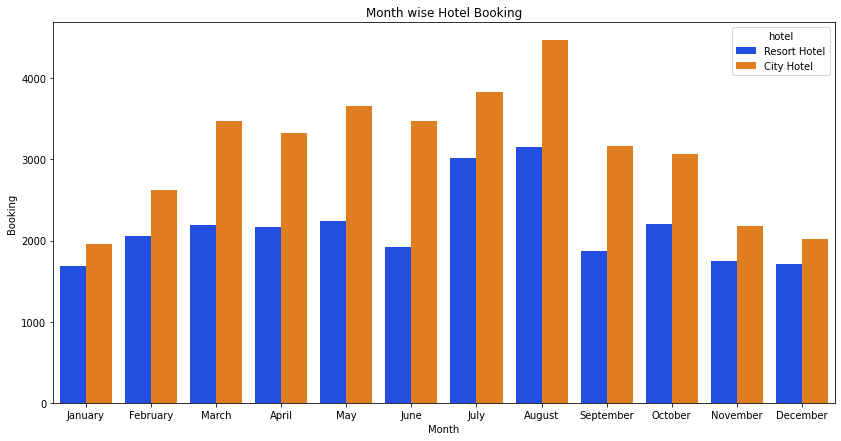

In [41]:
#setting figure size
plt.figure(figsize=(14,7))
#list of months for setting order
od=['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
#plotting countplot for month wise booking
sns.countplot(x=df_new['arrival_date_month'],order=od,hue=df["hotel"],
              palette='bright')

#setting labels for x, y and set title for countplot
plt.xlabel('Month')
plt.ylabel('Booking')
plt.title("Month wise Hotel Booking")

#Display the plot
plt.show()

From above plot we can see that august month is the busiest and january have lowest booking. From may to to october is peak months.

###Days in waiting list

In [42]:
#checking waiting days for booking
from pandas.core.base import value_counts
df_new['days_in_waiting_list'].value_counts(normalize=True)

0      0.991126
63     0.000712
87     0.000364
58     0.000332
122    0.000285
         ...   
100    0.000016
37     0.000016
109    0.000016
93     0.000016
23     0.000016
Name: days_in_waiting_list, Length: 97, dtype: float64

from above we can see that waiting for booing is almost 0 days(99%).

###Month and hotel wise ADR(Average Daily Rate)

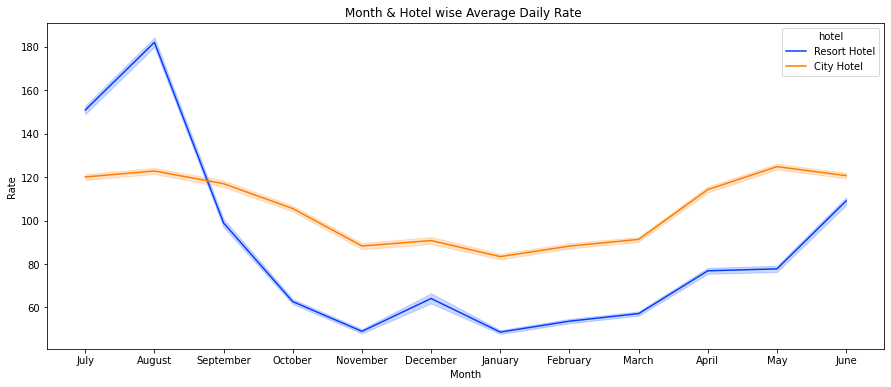

In [43]:
#setting figure size
plt.figure(figsize=(15,6))

#Plotting lineplot for ADR acording to month
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df_new,
             palette='bright')

#setting labels for x, y and set title for lineplot
plt.xlabel('Month')
plt.ylabel('Rate')
plt.title("Month & Hotel wise Average Daily Rate ")

#Display the plot
plt.show()

In [44]:
#checking hotel wise daily rates mean, standard deviation, meadian, min and max
df_new.groupby(["hotel"]).adr.agg(["mean","std","min","median","max"])

,mean,std,min,median,max
hotel,,,,,
City Hotel,108.642289,42.231459,0.0,102.41,510.0
Resort Hotel,93.001319,60.735929,0.0,74.25,508.0


In [45]:
#checking hotel and month wise daily rates mean, standard deviation, meadian,
# min and max
df_new.groupby(["hotel","arrival_date_month"]).adr.agg(["mean","std","min",
                                                        "median","max"])

mean        std  min   median     max
hotel        arrival_date_month                                             
City Hotel   April               114.251636  39.732125  0.0  108.000  336.00
             August              122.825388  47.447942  0.0  117.300  372.33
             December             90.769559  39.289094  0.0   85.500  451.50
             February             88.210810  31.617048  0.0   84.000  284.20
             January              83.378062  29.037663  0.0   80.000  284.20
             July                120.069489  44.334490  0.0  115.000  365.00
             June                120.673753  39.724390  0.0  117.000  333.67
             March                91.306933  32.239129  0.0   88.000  285.00
             May                 124.825944  41.181706  0.0  121.500  510.00
             November             88.271089  33.634882  0.0   81.900  260.00
             October             105.517410  37.955602  0.0  103.180  300.00
             September           116.973279  43.077543  0.0  114.000  345.00
Resort Hotel April                76.841664  33.704303  0.0   74.370  270.00
             August              182.103524  61.545740  0.0  180.750  426.25
             December             64.072826  47.406561  0.0   52.365  367.00
             February             53.624311  22.811046  0.0   48.000  174.00
             January              48.599615  19.792542  0.0   45.000  149.00
             July                150.914540  56.072453  0.0  146.700  508.00
             June                109.026942  44.075581  0.0  101.700  318.82
             March                57.112930  25.292168  0.0   55.000  193.71
             May                  77.725129  33.889199  0.0   72.000  222.02
             November             48.956548  20.987195  0.0   46.400  175.00
             October              62.634853  26.899500  0.0   58.000  208.00
             September            98.855456  42.131321  0.0   89.840  307.50

The average daily rate is equal to the average price for each hotel room sold for that day. The average daily rate fluctuates more for resort hotels than city hotels with standard deviations of 60 and 42 respectively. This is especially evident during the summer months (June, July, August and September) with prices ranging from 98 to 182. The winter months (December, January, February and March) have generally lower prices ranging from 57 to 91, except that there is a little peak in December which is probably due to Christmas and New Years. Even with the seasonal prices, it is the city hotels that maintain a higher price with a higher mean and median throughout the year.

###5.Country
checking which country most no of booking

In [46]:
#Creating new dataframe for country and most no booking
c_data= df_new['country'].value_counts().reset_index()[:20]
c_data.columns =['country','no_of_booking']
c_data

,country,no_of_booking
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
5,IRL,2347
6,ITA,1986
7,BEL,1670
8,NLD,1560
9,USA,1412


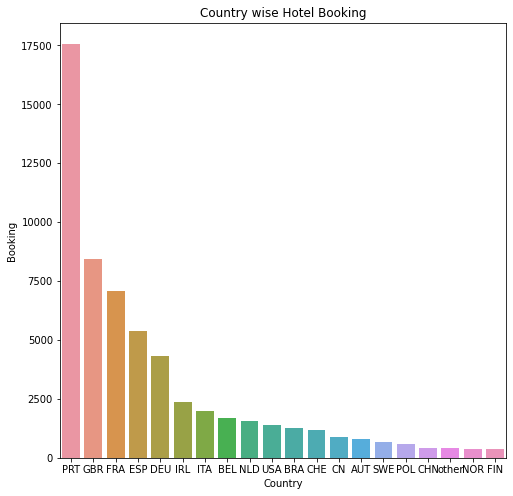

In [47]:
#setting figure size
plt.figure(figsize=(8,8))

#Ploting barplot for country wise booking
sns.barplot(x=c_data['country'],y=c_data['no_of_booking'])

#setting labels for x, y and set title for countplot
plt.xlabel('Country')
plt.ylabel('Booking')
plt.title("Country wise Hotel Booking")

#display the plot
plt.show()

Most of the guest are from Portugal(PRT) and UK(GBR) then other country

Checking hotel rate month and hotel wise for better understanding and deciding which time of year is better for booking

##6.Number of weekend/weekday nights booked

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


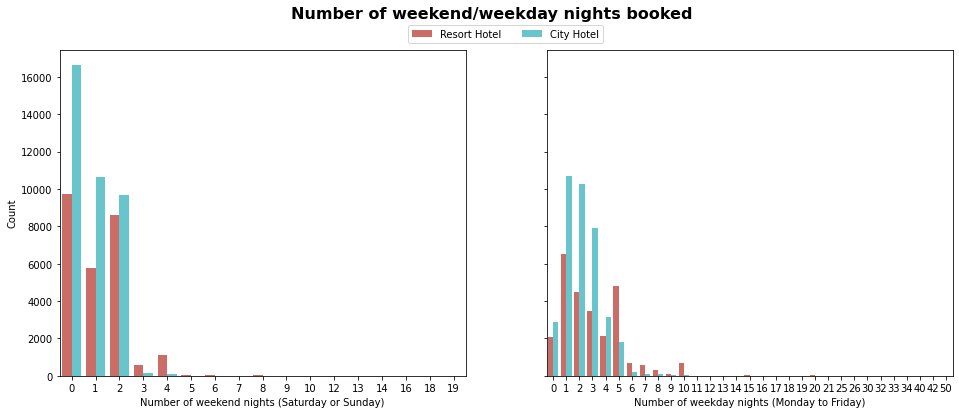

In [48]:
#setting figure size
fig,axes=plt.subplots(1,2,sharey=True,figsize=(16,6))

#Ploting countplot for stays in weekend nights
sns.countplot(df_new["stays_in_weekend_nights"],hue=df_new["hotel"],
              palette="hls",ax=axes[0])

#Ploting countplot for stays in week nights
sns.countplot(df_new["stays_in_week_nights"],hue=df_new["hotel"],
              palette="hls",ax=axes[1])

#setting labels for x and y for subplot
axes[0].set_xlabel("Number of weekend nights (Saturday or Sunday)")
axes[0].set_ylabel("Count")
axes[0].get_legend().set_visible(False)

#setting labels for x and y for subplot
axes[1].set_xlabel("Number of weekday nights (Monday to Friday)")
axes[1].set_ylabel("")
axes[1].legend(ncol=2,bbox_to_anchor=(0.15,1.09))

#setting subplot title
plt.suptitle("Number of weekend/weekday nights booked",fontweight="bold",
             fontsize=16,y=0.98)

#display the plot
plt.show()

Guests are more likely to book a hotel over the weekday as majority of the guests don't even stay over for one weekend night, and the number of weekday nights booked even extends to 50! I guess some guests are having a really long holiday, and probably an expensive one too right?

we will get total stay by adding stay in weekend nights and stay in week nights and check there daily rate

In [49]:
#Creating new column total nights stayed
df_new['total_nights']= (df_new['stays_in_weekend_nights']+
                         df_new['stays_in_week_nights'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


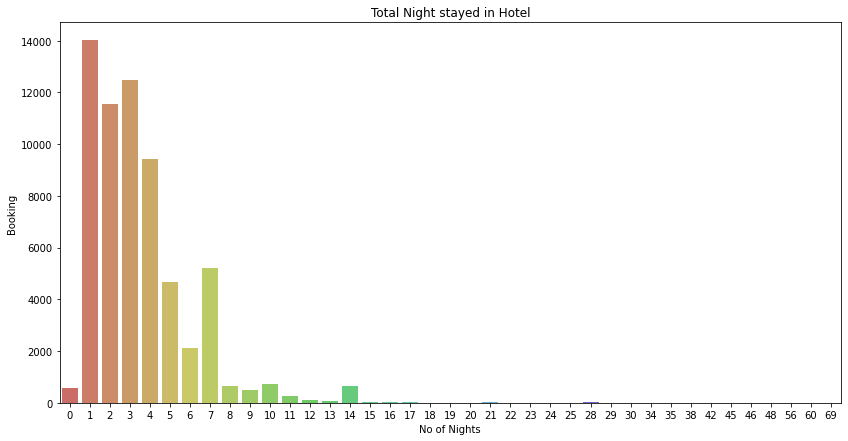

In [50]:
#setting figure size
plt.figure(figsize=(14,7))

#plotting countplot for total night stayed
sns.countplot(x=df_new['total_nights'], palette='hls')

#setting labels for x, y and set title for countplot
plt.xlabel('No of Nights')
plt.ylabel('Booking')
plt.title("Total Night stayed in Hotel")

#Display the plot
plt.show()

###Droping the outlier

In [51]:
# taking only total nights which are less than 16
df_new1 = df_new[df_new['total_nights']<16]

In [52]:
#droping zero nights
df_new1 = df_new1[df_new1['total_nights']!=0]

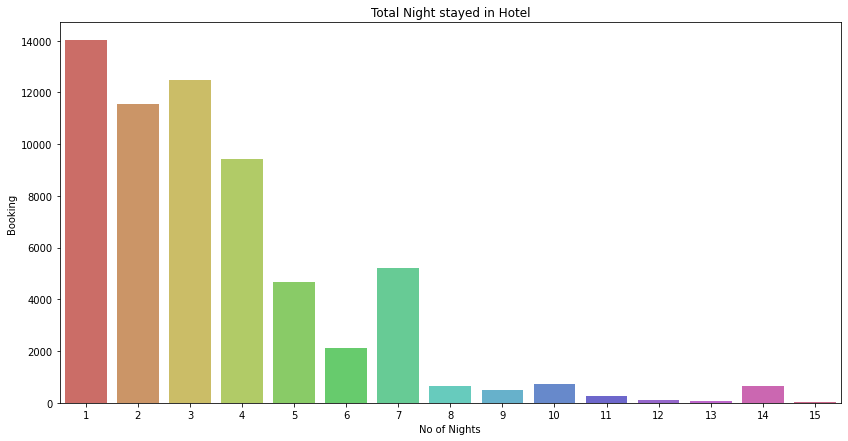

In [53]:
#setting figure size
plt.figure(figsize=(14,7))

#plotting countplot for total night stayed
sns.countplot(x=df_new1['total_nights'], palette='hls')

#setting labels for x, y and set title for countplot
plt.xlabel('No of Nights')
plt.ylabel('Booking')
plt.title("Total Night stayed in Hotel")

#Display the plot
plt.show()

###Total Average Rate 

In [54]:
#creating new column for total aveage rate 
df_new1['ar_total'] = df_new1['total_nights']*df_new1['adr']

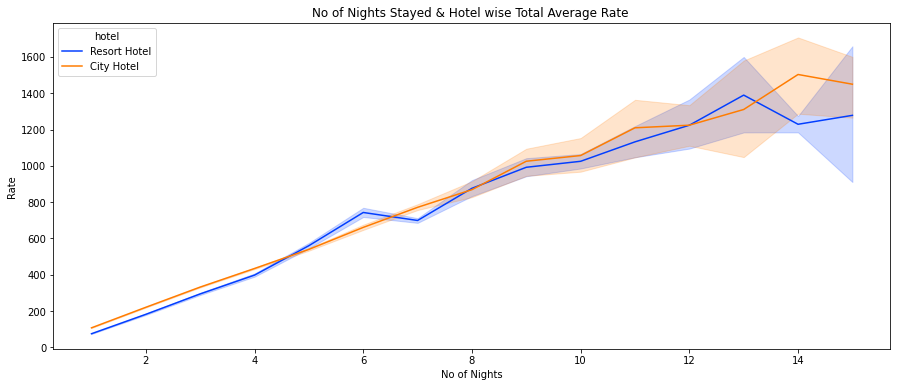

In [55]:
#setting figure size
plt.figure(figsize=(15,6))

#Plotting lineplot for Total AR acording to no of nights stayed
sns.lineplot(x='total_nights', y='ar_total', hue='hotel', data= df_new1,
             palette='bright')

#setting labels for x, y and set title for lineplot
plt.xlabel('No of Nights')
plt.ylabel('Rate')
plt.title("No of Nights Stayed & Hotel wise Total Average Rate ")

#Display the plot
plt.show()

Here we see that as increase in total night stayed so average rate also increase so to get the best deal you have to book when booking is low in hotel as we see above that january month have low average daily rate for booking

##7. Special Requests
Checking special request for predicting when you will get more special request

In [56]:
#checking unique value
df_new['total_of_special_requests'].unique()

array([0, 1, 3, 2, 4, 5])

In [57]:
#value counts for each counts
df_new['total_of_special_requests'].value_counts()

0    29228
1    22475
2     9280
3     1918
4      286
5       34
Name: total_of_special_requests, dtype: int64

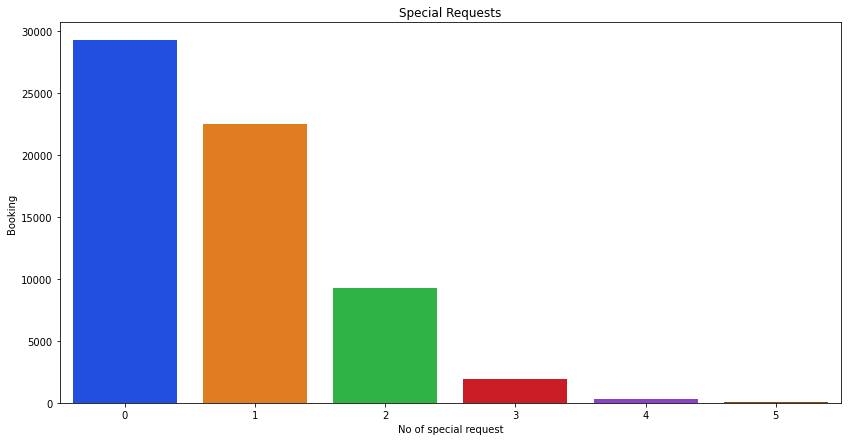

In [58]:
#setting figure size
plt.figure(figsize=(14,7))

#plotting countplot for special requests
sns.countplot(x=df_new['total_of_special_requests'], palette='bright')

#setting labels for x, y and set title for countplot
plt.xlabel('No of special request')
plt.ylabel('Booking')
plt.title("Special Requests")

#Display the plot
plt.show()

Most no of special request is 1

###Month Wise Special Request

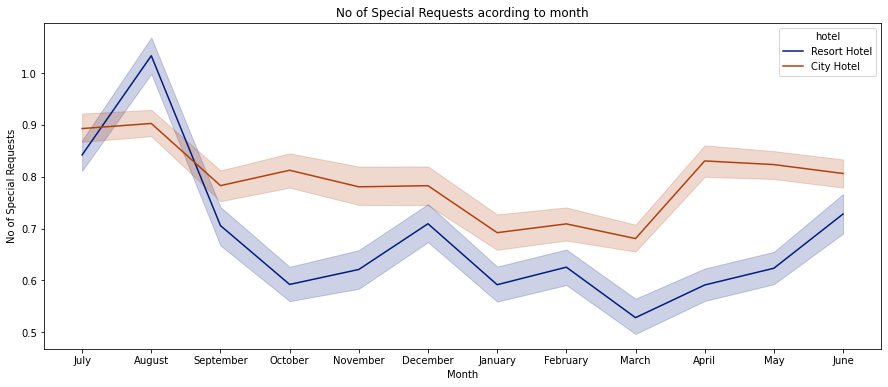

In [59]:
#setting figure size
plt.figure(figsize=(15,6))

#Plotting lineplot for Special Requests acording to month
sns.lineplot(x='arrival_date_month', y='total_of_special_requests',
             hue='hotel', data= df_new,
             palette='dark')

#setting labels for x, y and set title for lineplot
plt.xlabel('Month')
plt.ylabel('No of Special Requests')
plt.title("No of Special Requests acording to month")

#Display the plot
plt.show()

From above we can see that peaks month have most of the special requests

###8.Type Of Guest
Checking for which type of guest(Single,Couple or Family) book morw in hotel

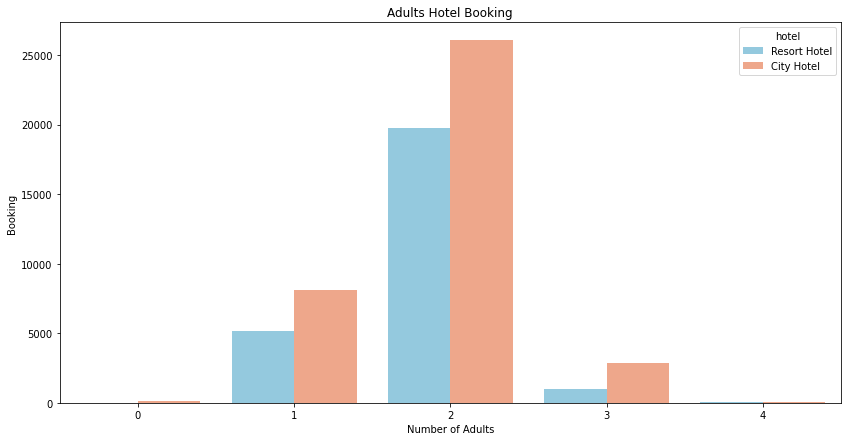

In [60]:
#setting figure size
plt.figure(figsize=(14,7))

#plotting countplot for adults
sns.countplot(x=df_new['adults'],hue=df["hotel"],
              palette=["skyblue","lightsalmon"])

#setting labels for x, y and set title for countplot
plt.xlabel('Number of Adults')
plt.ylabel('Booking')
plt.title("Adults Hotel Booking")

#Display the plot
plt.show()

In [61]:
## Select single, couple, multiple adults and family
single  = df_new[(df_new.adults==1) & (df_new.children==0) & (df_new.babies==0)]
couple  = df_new[(df_new.adults==2) & (df_new.children==0) & (df_new.babies==0)]
family  = df_new[df_new.adults + df_new.children + df_new.babies > 2]

In [62]:
## Make the list of Category names, and their total percentage
Labels = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df_new.shape[0]*100 for x in count]

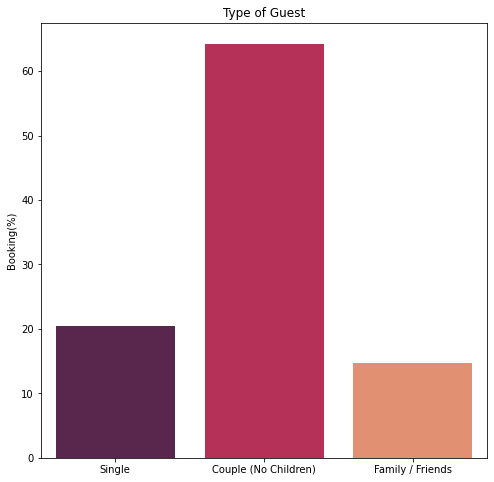

In [63]:
#setting figure size
plt.figure(figsize=(8,8))

#Ploting barplot for country wise booking
sns.barplot(y=count_percent,x=Labels, palette='rocket')

#setting labels for y and set title for countplot
plt.ylabel('Booking(%)')
plt.title("Type of Guest")

#display the plot
plt.show()

From above we can see that most of the booking made by couples

In [64]:
#Creating new column for totalguest
df_new['total_guest']= df_new['adults']+df_new['children']+df_new['babies']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


###9.Type of Customer
checking which type of customer made most of the booking

In [65]:
#Counting value for customer type
df["customer_type"].value_counts()

Transient          71862
Transient-Party    11692
Contract            3135
Group                541
Name: customer_type, dtype: int64

Text(0.5, 1.0, 'Customer Type')

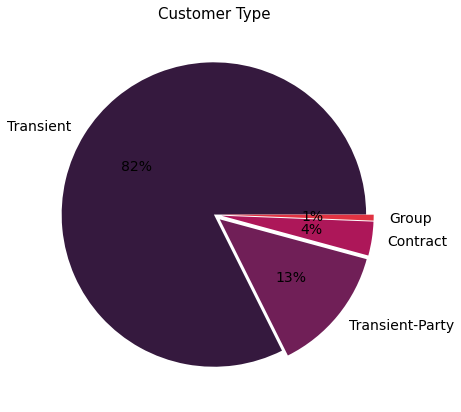

In [66]:
#for rocket colour for pie chart
palette_color = sns.color_palette('rocket') 
co_t=df['customer_type'].value_counts()

#setting figure size
plt.figure(figsize=(14,7))

#Plotting pie chart for better understanding from seaborn
pie=plt.pie(co_t, labels=co_t.index, colors=palette_color,
         autopct='%.0f%%',explode=[0,0.05,0.05,0.05],
         textprops={'fontsize': 14})

#setting title for plot
plt.title('Customer Type',fontsize= 15,)


About 82% of them are not part of a party (i.e. Transient) and 13% of them are (i.e. Transient-Party). Contract and Group bookings make up the remaining 4% with 3135 and 541 respectively.

###10.Parking Space 
Checking how many booking required parking space

In [67]:
#value counts for car parking space required
df["required_car_parking_spaces"].value_counts()

0    79924
1     7273
2       28
3        3
8        2
Name: required_car_parking_spaces, dtype: int64

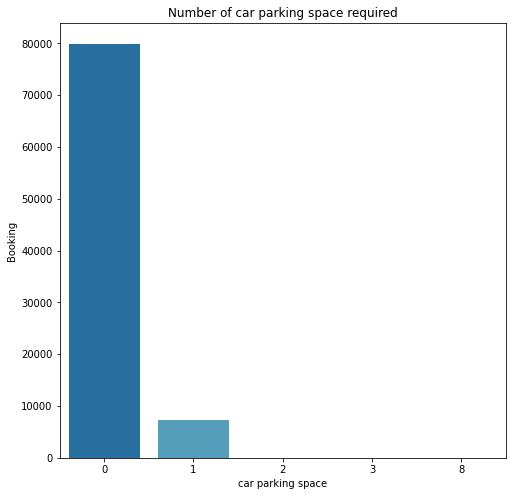

In [68]:
#setting figure size
plt.figure(figsize=(8,8))

#Ploting countplot for car parking required
sns.countplot(x=df["required_car_parking_spaces"], palette='GnBu_r')

#setting labels for x, y and set title for countplot
plt.xlabel('car parking space')
plt.ylabel('Booking')
plt.title("Number of car parking space required")

#display the plot
plt.show()

The number of car parking spaces requests ranges from 0 to 8, with majority of them being 0.

###11.Types of meals booked

In [69]:
#value counts for meal type
df["meal"].value_counts()

BB           67907
SC            9391
HB            9080
Undefined      492
FB             360
Name: meal, dtype: int64

In [70]:
#replaceing Unddfined with SC 
df["meal"].replace("Undefined","SC",inplace=True)

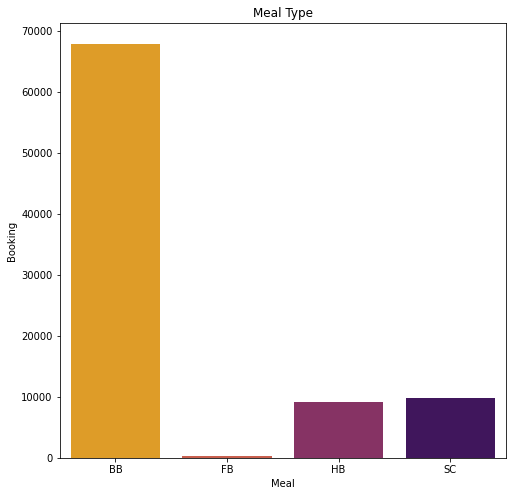

In [71]:
#setting figure size
plt.figure(figsize=(8,8))

#Ploting countplot for meal type
sns.countplot(x=df["meal"], palette='inferno_r')

#setting labels for x, y and set title for countplot
plt.xlabel('Meal')
plt.ylabel('Booking')
plt.title("Meal Type")

#display the plot
plt.show()

Approximately 77% of the guests opt for bed and breakfast, followed by 12% for half board which is breakfast and one other meal (usually dinner), 10% for no meal, and the remaining 1% for full board which is breakfast, lunch and dinner.

##12.Market Segment & Booking Distribution Channel

In [72]:
#value counts for market segment
df["market_segment"].value_counts()

Online TA        51553
Offline TA/TO    13855
Direct           11780
Groups            4922
Corporate         4200
Complementary      692
Aviation           226
Undefined            2
Name: market_segment, dtype: int64

In [73]:
#value counts for distribution channel
df["distribution_channel"].value_counts()

TA/TO        69028
Direct       12954
Corporate     5062
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

In [74]:
#replaceing Unddfined with TA/TO
df["distribution_channel"].replace("Undefined","TA/TO",inplace=True)

In [75]:
#replaceing Unddfined with Online TA 
df["market_segment"].replace("Undefined","Online TA",inplace=True)

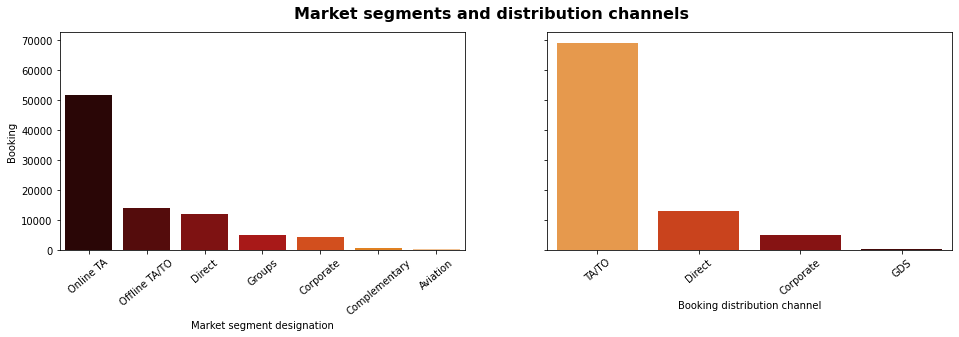

In [76]:
#setting figure size
fig,axes=plt.subplots(1,2,sharey=True,figsize=(16,4))

#Ploting countplot for market segment
sns.countplot(x=df["market_segment"], palette='gist_heat',ax=axes[0],
              order=df["market_segment"].value_counts().index)

#Ploting countplot for distribution channel
sns.countplot(x=df["distribution_channel"], palette='gist_heat_r',ax=axes[1],
              order=df["distribution_channel"].value_counts().index)

#setting labels for x and y for subplot 0
axes[0].set_xlabel('Market segment designation')
axes[0].set_ylabel('Booking')
axes[0].set_xticklabels(df["market_segment"].value_counts().index,rotation=40)

#setting labels for x and y for subplot 1
axes[1].set_xlabel('Booking distribution channel')
axes[1].set_ylabel('')
axes[1].set_xticklabels(df["distribution_channel"].value_counts().index,
                        rotation=40)

#setting subplot title
plt.suptitle("Market segments and distribution channels",fontweight="bold",
             fontsize=16,y=0.97)

#display the plot
plt.show()

Majority of the guests booked the hotels through both online and offline travel agents and tour operators (i.e. Online TA, Offline TA/TO, TA/TO) as opposed to Direct bookings themselves and Corporate bookings

##13.Average daily Rate(Lead Time)

Text(0.5, 0, 'Lead time (days)')

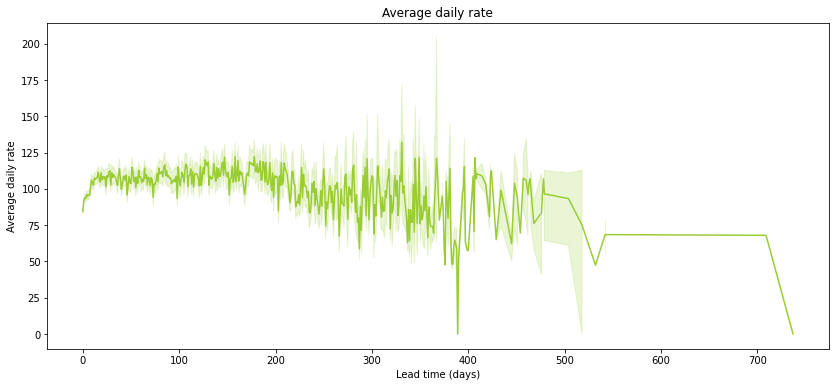

In [77]:
#setting figure size
plt.figure(figsize=(14,6))

#Plotting lineplot for ADR(lead time)
sns.lineplot(x=df_new["lead_time"],y=df["adr"],color="yellowgreen")

#setting labels for x, y and set title for lineplot
plt.title("Average daily rate")
plt.ylabel("Average daily rate")
plt.xlabel("Lead time (days)")

Making a booking at least 175 days in advance does seem to give a lower price in general, or the next best would be to sweep up any last minute deals within 10 days of the booking.

##14.Average daily Rate(Repeated Guest)

In [78]:
#seprating new guest and repeated guest acording to hotel and month
city_new_guest_month =df["arrival_date_month"].loc[(
    df["is_repeated_guest"]==0)&(df["hotel"]=="City Hotel")]
city_repeat_guest_month = df["arrival_date_month"].loc[(
    df["is_repeated_guest"]==1)&(df["hotel"]=="City Hotel")]
resort_new_guest_month = df["arrival_date_month"].loc[(
    df["is_repeated_guest"]==0)&(df["hotel"]=="Resort Hotel")]
resort_repeat_guest_month = df["arrival_date_month"].loc[(
    df["is_repeated_guest"]==1)&(df["hotel"]=="Resort Hotel")]

#seprating new guest and repeated guest acording to hotel and adr
city_new_guest_adr = df["adr"].loc[(df["is_repeated_guest"]==0)&
                                   (df["hotel"]=="City Hotel")]
city_repeat_guest_adr = df["adr"].loc[(df["is_repeated_guest"]==1)&
                                      (df["hotel"]=="City Hotel")]
resort_new_guest_adr = df["adr"].loc[(df["is_repeated_guest"]==0)&
                                     (df["hotel"]=="Resort Hotel")]
resort_repeat_guest_adr = df["adr"].loc[(df["is_repeated_guest"]==1)&
                                        (df["hotel"]=="Resort Hotel")]


Text(0.5, 0.98, 'Average daily rate (Repeated Guest)')

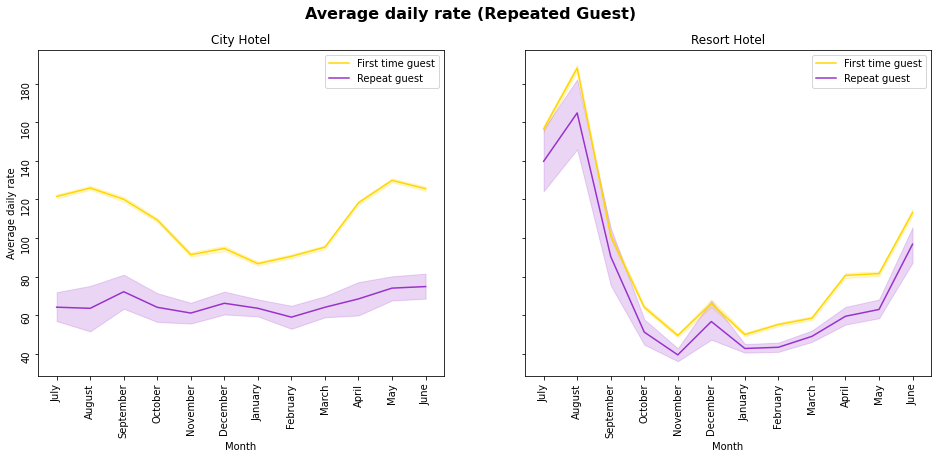

In [79]:
#setting figure size and subplot
fig,axes=plt.subplots(1,2,sharey=True,figsize=(16,6))

#plotting lineplt for new guest adr acording to city hotel and month
sns.lineplot(x=city_new_guest_month,y=city_new_guest_adr,
             label="First time guest",color="gold",ax=axes[0])

#plotting lineplt for repeated guest adr acording to city hotel and month
sns.lineplot(x=city_repeat_guest_month,y=city_repeat_guest_adr,
             label="Repeat guest",color="darkorchid",ax=axes[0])

#plotting lineplt for new guest adr acording to resort hotel and month
sns.lineplot(x=resort_new_guest_month,y=resort_new_guest_adr,
             label="First time guest",color="gold",ax=axes[1])

#plotting lineplt for repeated guest adr acording to resort hotel and month
sns.lineplot(x=resort_repeat_guest_month,y=resort_repeat_guest_adr,
             label="Repeat guest",color="darkorchid",ax=axes[1])

#setting labels for x and y for subplot 0
axes[0].set_title("City Hotel")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Average daily rate")
axes[0].tick_params(labelrotation=90)


#setting labels for x and y for subplot 1
axes[1].set_title("Resort Hotel")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("")
axes[1].tick_params(labelrotation=90)

#setting subplot title
plt.suptitle("Average daily rate (Repeated Guest)",fontweight="bold",
             fontsize=16,y=0.98)

Customer will get better deal if they are repeated guests regardless of whether they book a city or resort hotel! Perhaps it is time to join the hotel loyalty programme.

##Correlation matrix

In [80]:
#droping three columns is_canceled, agent and company 
co_df=df_new.drop(['is_canceled','agent','company'],axis=1)

Text(0.5, 1.0, 'Co-relation of the columns')

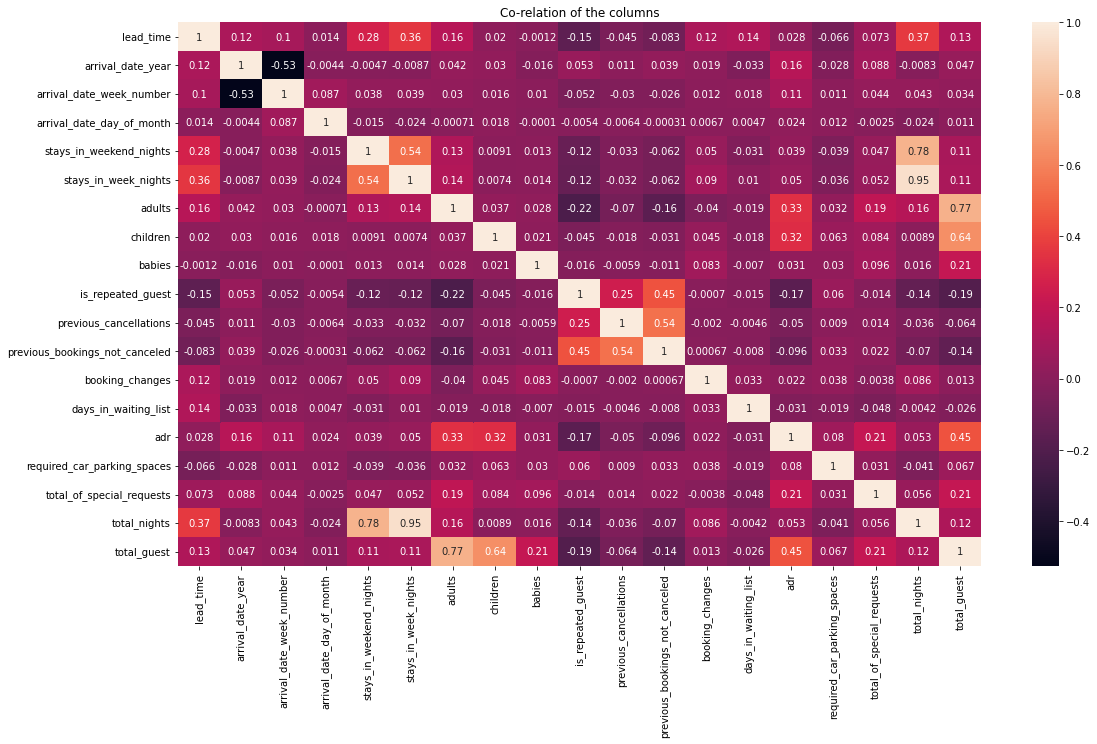

In [81]:
#plotting correlation matrix for hotel booking dataframe
plt.figure(figsize=(18,10))
sns.heatmap(co_df.corr(),annot=True)
plt.title('Co-relation of the columns')

#Conclusion

1.   Almost 61% of the total guests opt for a city hotel instead of a resort hotel.
2.   In both hotels 19% to 24% booking were cancelled.
3.   Summer months(June to mid-September) are more expensive for resort hotels while the prices for city hotels don't really fluctuate throughout the year.
4.   Special request increases in summer time when booking is high.
5.	 Almost all of the guest’s holiday without any children or babies.
6.	 Majority of the guests booked the hotels through both online and offline travel agents and tour operators
7.	 To get the most bang for your buck you should book at least 175 days in advance, make the booking directly with the hotel and also join any loyalty programme.
